In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

EDA

In [40]:
import warnings
warnings.filterwarnings('ignore')

accuracy = {}

In [3]:
df = pd.read_csv('bmd.csv',index_col=0)
df.head()

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd,T-Score,Condition
id,,,,,,,,,,
5495,35.814058,M,no fracture,79.0,168.5,No medication,33,0.7895,-1.250000,Osteopenia
3088,36.648311,M,no fracture,54.0,175.0,No medication,11,0.8560,-0.704918,Healthy Bone Density
834,37.461995,M,fracture,55.0,156.0,No medication,7,0.6884,-2.078689,Osteopenia
6696,39.254947,M,no fracture,76.0,173.5,No medication,6,1.0502,0.886885,Healthy Bone Density
5288,40.232367,M,no fracture,66.0,165.0,No medication,8,1.0390,0.795082,Healthy Bone Density


In [4]:
from sklearn import preprocessing

label_encoder =  preprocessing.LabelEncoder()

for col in df.columns:
    df[col]=label_encoder.fit_transform(df[col])

df.head()

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd,T-Score,Condition
id,,,,,,,,,,
5495,0,1,1,41,40,2,28,83,83,1
3088,1,1,1,13,48,2,6,111,111,0
834,2,1,0,14,18,2,2,46,46,1
6696,3,1,1,38,46,2,1,159,159,0
5288,4,1,1,26,34,2,3,157,157,0


In [5]:

from sklearn.model_selection import train_test_split

X = df.drop(['Condition'], axis=1)
y = df['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [6]:
cols = X_train.columns

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()


,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd,T-Score
count,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02
mean,1.505387e-17,1.392483e-16,8.279629e-17,9.408670e-17,1.655926e-16,3.481208e-17,5.127725e-17,-2.869644e-17,-2.869644e-17
std,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00,1.004264e+00
min,-1.771785e+00,-1.034493e+00,-1.450953e+00,-2.126440e+00,-1.845817e+00,-3.274185e+00,-1.115380e+00,-1.733528e+00,-1.733528e+00
25%,-8.035808e-01,-1.034493e+00,-1.450953e+00,-8.284314e-01,-8.605201e-01,4.587023e-01,-8.408303e-01,-8.761512e-01,-8.761512e-01
50%,-3.004203e-02,9.666572e-01,6.892024e-01,1.442632e-03,-6.112812e-02,4.587023e-01,-3.550888e-01,1.317792e-02,1.317792e-02
75%,8.459523e-01,9.666572e-01,6.892024e-01,8.525955e-01,8.312164e-01,4.587023e-01,4.896790e-01,8.812057e-01,8.812057e-01
max,1.670719e+00,9.666572e-01,6.892024e-01,2.129325e+00,1.946647e+00,4.587023e-01,2.686075e+00,1.759884e+00,1.759884e+00


Random Frost 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)

print('Random Forest Classifier Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rfc)))
accuracy['Random Forest']=(accuracy_score(y_test, y_pred_rfc))

Random Forest Classifier Classifier Model Accuracy: 0.9412


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)


[[20  0  0  0]
 [ 0 19  0  0]
 [ 0  1  2  0]
 [ 1  0  0  8]]


In [11]:
cl_report_rfc = classification_report(y_test, y_pred_rfc)
print(cl_report_rfc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.95      1.00      0.97        19
           2       1.00      0.67      0.80         3
           3       1.00      0.89      0.94         9

    accuracy                           0.96        51
   macro avg       0.98      0.89      0.92        51
weighted avg       0.96      0.96      0.96        51



SVM

In [48]:
from sklearn.svm import SVC

svc=SVC() 
svc.fit(X_train,y_train)

y_pred_svm=svc.predict(X_test)

print('SVM Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))
accuracy['SVM']=(accuracy_score(y_test, y_pred_svm))

SVM Classifier Model Accuracy: 0.8039


In [13]:
cm_SVM = confusion_matrix(y_test, y_pred_svm)
cm_SVM

array([[18,  2,  0,  0],
       [ 1, 18,  0,  0],
       [ 0,  3,  0,  0],
       [ 1,  3,  0,  5]])

In [14]:
cl_SVM = classification_report(y_test,y_pred_svm)
print(cl_SVM)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.69      0.95      0.80        19
           2       0.00      0.00      0.00         3
           3       1.00      0.56      0.71         9

    accuracy                           0.80        51
   macro avg       0.65      0.60      0.60        51
weighted avg       0.79      0.80      0.78        51



XGBOOST

In [49]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print('XGBoost Classifier Model Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))
accuracy['XGBoost']=(accuracy_score(y_test, y_pred_xgb))

XGBoost Classifier Model Accuracy: 0.9216


In [59]:
cm_XGB = confusion_matrix(y_test, y_pred_xgb)
print(cm_XGB)

[[20  0  0  0]
 [ 1 18  0  0]
 [ 0  1  1  1]
 [ 1  0  0  8]]


In [31]:
cl_XGB = classification_report(y_test,y_pred_xgb, zero_division=1)
print(cl_XGB)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.95      0.95      0.95        19
           2       1.00      0.33      0.50         3
           3       0.89      0.89      0.89         9

    accuracy                           0.92        51
   macro avg       0.94      0.79      0.82        51
weighted avg       0.93      0.92      0.91        51



ADAboost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

cls_abc = abc.fit(X_train, y_train)
y_pred_abc = cls_abc.predict(X_test)

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_abc))
accuracy['ADABoost']=(accuracy_score(y_test, y_pred_abc))

AdaBoost Classifier Model Accuracy: 0.9215686274509803


In [19]:
cm_abc = confusion_matrix(y_test, y_pred_abc)
print(cm_abc)

[[20  0  0  0]
 [ 0 19  0  0]
 [ 0  1  0  2]
 [ 0  0  1  8]]


In [30]:
cl_report_abc = classification_report(y_test, y_pred_abc, zero_division=1)
print(cl_report_abc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.97        19
           2       0.00      0.00      0.00         3
           3       0.80      0.89      0.84         9

    accuracy                           0.92        51
   macro avg       0.69      0.72      0.70        51
weighted avg       0.89      0.92      0.90        51



LightGBM

In [78]:
import lightgbm as lgb

In [91]:
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [92]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [93]:
num_round=50


clf_lgb = lgb.train(param,lgb_train,num_round)
# clf_lgb = lgb.train(params,train_set=lgb_train,valid_sets=lgb_eval,early_stopping_rounds=30)


# y_pred_lgb=clf_lgb.predict(X_test)
# print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgb)))
# accuracy['SVM']=(accuracy_score(y_test, y_pred_lgb))

AttributeError: 'tuple' object has no attribute 'encode'

In [94]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

AttributeError: 'tuple' object has no attribute 'encode'

CatBoost

In [67]:
from catboost import CatBoostClassifier

clf_catb = CatBoostClassifier()
clf_catb.fit(X_train, y_train)

y_pred_ccatb=clf_catb.predict(X_test)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ccatb)))
accuracy['Catboost']=(accuracy_score(y_test, y_pred_ccatb))


Learning rate set to 0.070956
0:	learn: 1.3147720	total: 1.02ms	remaining: 1.02s
1:	learn: 1.2452722	total: 1.63ms	remaining: 811ms
2:	learn: 1.1945264	total: 2.39ms	remaining: 794ms
3:	learn: 1.1306947	total: 3.06ms	remaining: 763ms
4:	learn: 1.0765416	total: 3.67ms	remaining: 731ms
5:	learn: 1.0165332	total: 4.68ms	remaining: 775ms
6:	learn: 0.9480635	total: 5.91ms	remaining: 839ms
7:	learn: 0.9091685	total: 8.46ms	remaining: 1.05s
8:	learn: 0.8659381	total: 9.16ms	remaining: 1.01s
9:	learn: 0.8337935	total: 10ms	remaining: 994ms
10:	learn: 0.8032188	total: 11.3ms	remaining: 1.01s
11:	learn: 0.7695408	total: 12.5ms	remaining: 1.03s
12:	learn: 0.7360813	total: 13.8ms	remaining: 1.04s
13:	learn: 0.7104915	total: 14.9ms	remaining: 1.05s
14:	learn: 0.6931855	total: 16.1ms	remaining: 1.05s
15:	learn: 0.6665475	total: 17ms	remaining: 1.04s
16:	learn: 0.6337873	total: 18ms	remaining: 1.04s
17:	learn: 0.6124844	total: 18.7ms	remaining: 1.02s
18:	learn: 0.5898054	total: 19.4ms	remaining: 1s
1

In [68]:
cm_catb= confusion_matrix(y_test, y_pred_ccatb)
print(cm_catb)

[[20  0  0  0]
 [ 0 19  0  0]
 [ 0  0  2  1]
 [ 1  0  0  8]]


In [69]:
cl_report_catb = classification_report(y_test, y_pred_ccatb, zero_division=1)
print(cl_report_catb)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00        19
           2       1.00      0.67      0.80         3
           3       0.89      0.89      0.89         9

    accuracy                           0.96        51
   macro avg       0.96      0.89      0.92        51
weighted avg       0.96      0.96      0.96        51



In [70]:
accuracy

{'Random Forest': 0.9411764705882353,
 'SVM': 0.803921568627451,
 'XGBoost': 0.9215686274509803,
 'ADABoost': 0.9215686274509803,
 'Catboost': 0.9607843137254902}

Graphs

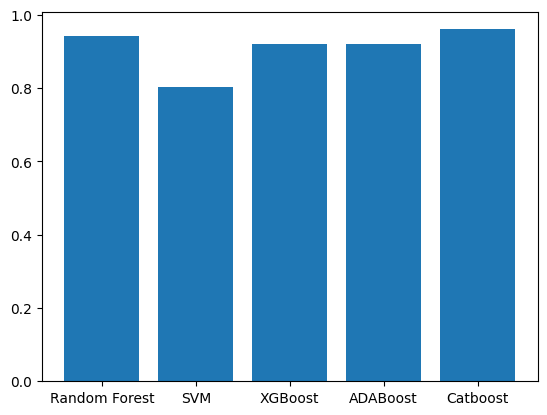

In [76]:
names = list(accuracy.keys())
values = list(accuracy.values())

plt.bar(range(len(accuracy)), values, tick_label=names)
plt.show()